In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics

In [2]:
def remove_acks(panda):
    panda = panda[(panda['TCPport_dst'] == 445) | (panda['TCPport_dst'] == 139)]
    return panda 

In [3]:
def remove_treeID(panda, treeID):
    panda = panda[panda['TreeID'] != treeID]
    return panda

In [4]:
def remove_SessionID(panda, SessionID):
    panda = panda[panda['SessionID'] != SessionID]
    return panda

In [5]:
def read_from_txt(file_name):
    df = pd.read_csv(file_name, encoding = "ISO-8859-1",error_bad_lines=False , sep=" ",index_col=False)
    return df

In [6]:
def create_csv(panda, file_name):
    panda.to_csv(file_name, index=False)

In [7]:
def plot_freq_over_time(panda, SMBcommand, num_bins):
    plt.hist(x=panda.loc[panda['SMBcommand'] == SMBcommand].Timestamp.astype(float) , bins=num_bins)
    plt.show()

In [8]:
def pie_chart(panda):
    labels = '4', '5', '6', '7', '8','9', '10', '11', '12','13','14', '15', '16', '17'
    sizes = [len(panda.loc[panda['SMBcommand'] == 4]),
             len(panda.loc[panda['SMBcommand'] == 5]),
             len(panda.loc[panda['SMBcommand'] == 6]),
             len(panda.loc[panda['SMBcommand'] == 7]),
             len(panda.loc[panda['SMBcommand'] == 8]),
             len(panda.loc[panda['SMBcommand'] == 9]),
             len(panda.loc[panda['SMBcommand'] == 10]),
             len(panda.loc[panda['SMBcommand'] == 11]),
             len(panda.loc[panda['SMBcommand'] == 12]),
             len(panda.loc[panda['SMBcommand'] == 13]),
             len(panda.loc[panda['SMBcommand'] == 14]),
             len(panda.loc[panda['SMBcommand'] == 15]),
             len(panda.loc[panda['SMBcommand'] == 16]),
             len(panda.loc[panda['SMBcommand'] == 17])] 

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  

    plt.show()

In [9]:
def stat_summary_of_command(panda, SMBcommand, final):
    interval_range = pd.interval_range(start=0, freq=5, end=final, closed='left')
    bucket= panda.loc[panda['SMBcommand'] == SMBcommand]
    bucket = pd.cut(bucket['Timestamp'].astype(float), bins=interval_range)
    print(bucket.value_counts().describe())
    fig1, ax1 = plt.subplots()
    ax1.set_title("Frequncy of call "+ str(SMBcommand))
    ax1.boxplot(bucket.value_counts())


In [10]:
def percentage_of_call(panda, SMBcommand):
    total = len(panda)
    SMB_total= len(panda.loc[panda['SMBcommand'] == SMBcommand])
    print("\nThis comamnd "+ str(SMBcommand))
    print("all calls "+ str(total))
    print("this call " +str(SMB_total))
    print("percentage "+str(SMB_total/total))

In [11]:
def show_all_percentage(panda):
    for x in range(0, 19):
        percentage_of_call(panda, x)

In [12]:
def return_five_max(panda, base):
    column = panda["Timestamp"].astype(float)
    a_number=column.max()
    nearest_multiple = base * math.ceil(a_number/base)
    return nearest_multiple

In [13]:
def show_analysis(panda, smb_num):
    final_time = return_five_max(panda,5)
    plot_freq_over_time(panda, smb_num, int(final_time/5))
    pie_chart(panda)
    stat_summary_of_command(panda, smb_num, final_time)

In [14]:
def number_of_file(panda):
    df = panda.groupby('FileID')['Timestamp'].nunique()
    print (len(df))

In [52]:
def  number_of_files_for_many(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10):
    print("\nlog 1")
    number_of_file(p1)
    print("\nlog 2")
    number_of_file(p2)
    print("\nlog 3")
    number_of_file(p3)
    print("\nlog 4")
    number_of_file(p4)
    print("\nlog 5")
    number_of_file(p5)
    print("\nlog 6")
    number_of_file(p6)
    print("\nlog 7")
    number_of_file(p7)
    print("\nlog 8")
    number_of_file(p8)
    print("\nlog 9")
    number_of_file(p9)
    print("\nlog 10")
    number_of_file(p10)

In [16]:
def Combined_analysis(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, SMBcommand): 
    frames = [p1, p2, p3, p4 ,p5, p6, p7, p8, p9, p10]
    Combined = pd.concat(frames)
    
    freq = 60
    num_max =return_five_max(Combined,freq)
    
    pie_chart(Combined)
    
    #plot_freq_over_time(Combined, SMBcommand, int(num_max/freq))
    x=Combined.loc[Combined['SMBcommand'] == SMBcommand].Timestamp.astype(float)
    plt.hist(x , bins=int(num_max/freq), weights=np.ones_like(x)/10)
    plt.show()
    
    # do stats on the Combined data
    interval_range = pd.interval_range(start=0, freq=freq, end=num_max, closed='left')
    bucket= Combined.loc[Combined['SMBcommand'] == SMBcommand]
    bucket = pd.cut(bucket['Timestamp'].astype(float), bins=interval_range)
    
    freq1 = p1.loc[p1['SMBcommand'] == SMBcommand]
    freq2 = p2.loc[p2['SMBcommand'] == SMBcommand]
    freq3 = p3.loc[p3['SMBcommand'] == SMBcommand]
    freq4 = p4.loc[p4['SMBcommand'] == SMBcommand]
    freq5 = p5.loc[p5['SMBcommand'] == SMBcommand]
    freq6 = p6.loc[p6['SMBcommand'] == SMBcommand]
    freq7 = p7.loc[p7['SMBcommand'] == SMBcommand]
    freq8 = p8.loc[p8['SMBcommand'] == SMBcommand]
    freq9 = p9.loc[p9['SMBcommand'] == SMBcommand]
    freq10 = p10.loc[p10['SMBcommand'] == SMBcommand]
    
    freq1 = pd.cut(freq1['Timestamp'].astype(float), bins=interval_range)
    freq2 = pd.cut(freq2['Timestamp'].astype(float), bins=interval_range)
    freq3 = pd.cut(freq3['Timestamp'].astype(float), bins=interval_range)
    freq4 = pd.cut(freq4['Timestamp'].astype(float), bins=interval_range)
    freq5 = pd.cut(freq5['Timestamp'].astype(float), bins=interval_range)
    freq6 = pd.cut(freq6['Timestamp'].astype(float), bins=interval_range)
    freq7 = pd.cut(freq7['Timestamp'].astype(float), bins=interval_range)
    freq8 = pd.cut(freq8['Timestamp'].astype(float), bins=interval_range)
    freq9 = pd.cut(freq9['Timestamp'].astype(float), bins=interval_range)
    freq10 = pd.cut(freq10['Timestamp'].astype(float), bins=interval_range)
    
    freq1 = freq1.value_counts()
    freq2 = freq2.value_counts()
    freq3 = freq3.value_counts()
    freq4 = freq4.value_counts()
    freq5 = freq5.value_counts()
    freq6 = freq6.value_counts()
    freq7 = freq7.value_counts()
    freq8 = freq8.value_counts()
    freq9 = freq9.value_counts()
    freq10 = freq10.value_counts()
    
    all_freq = freq10
    
    for i in interval_range:
        data = [freq1[i], freq2[i], freq3[i], freq4[i], freq5[i],
                freq6[i], freq7[i], freq8[i], freq9[i], freq10[i]]
        all_freq[i] = statistics.median(data)
        
    #print(all_freq)
    #plt.hist(x= freq9,y=freq9 )
    #plt.show()
    #hist = all_freq.hist()
    
    print(all_freq.describe())
    fig1, ax1 = plt.subplots()
    ax1.set_title("Frequncy of call "+ str(SMBcommand))
    ax1.boxplot(all_freq)

In [17]:
def Combined_analysis_boxblots(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, SMBcommand):
    freq1 = p1.loc[p1['SMBcommand'] == SMBcommand]
    freq2 = p2.loc[p2['SMBcommand'] == SMBcommand]
    freq3 = p3.loc[p3['SMBcommand'] == SMBcommand]
    freq4 = p4.loc[p4['SMBcommand'] == SMBcommand]
    freq5 = p5.loc[p5['SMBcommand'] == SMBcommand]
    freq6 = p6.loc[p6['SMBcommand'] == SMBcommand]
    freq7 = p7.loc[p7['SMBcommand'] == SMBcommand]
    freq8 = p8.loc[p8['SMBcommand'] == SMBcommand]
    freq9 = p9.loc[p9['SMBcommand'] == SMBcommand]
    freq10 = p10.loc[p10['SMBcommand'] == SMBcommand]
    
    freq=5
    interval_range = pd.interval_range(start=0, freq=freq, end=return_five_max(freq1,freq), closed='left')
    freq1 = pd.cut(freq1['Timestamp'].astype(float), bins=interval_range)
    
    interval_range = pd.interval_range(start=0, freq=freq, end=return_five_max(freq2,freq), closed='left')
    freq2 = pd.cut(freq2['Timestamp'].astype(float), bins=interval_range)
    
    interval_range = pd.interval_range(start=0, freq=freq, end=return_five_max(freq3,freq), closed='left')
    freq3 = pd.cut(freq3['Timestamp'].astype(float), bins=interval_range)
                                       
    interval_range = pd.interval_range(start=0, freq=freq, end=return_five_max(freq4,freq), closed='left')
    freq4 = pd.cut(freq4['Timestamp'].astype(float), bins=interval_range)
                                       
    interval_range = pd.interval_range(start=0, freq=freq, end=return_five_max(freq5,freq), closed='left')
    freq5 = pd.cut(freq5['Timestamp'].astype(float), bins=interval_range)
                                       
    interval_range = pd.interval_range(start=0, freq=freq, end=return_five_max(freq6,freq), closed='left')
    freq6 = pd.cut(freq6['Timestamp'].astype(float), bins=interval_range)
                                       
    interval_range = pd.interval_range(start=0, freq=freq, end=return_five_max(freq7,freq), closed='left')
    freq7 = pd.cut(freq7['Timestamp'].astype(float), bins=interval_range)
                                       
    interval_range = pd.interval_range(start=0, freq=freq, end=return_five_max(freq8,freq), closed='left')
    freq8 = pd.cut(freq8['Timestamp'].astype(float), bins=interval_range)
                                       
    interval_range = pd.interval_range(start=0, freq=freq, end=return_five_max(freq9,freq), closed='left')
    freq9 = pd.cut(freq9['Timestamp'].astype(float), bins=interval_range)
                                       
    interval_range = pd.interval_range(start=0, freq=freq, end=return_five_max(freq10,freq), closed='left')
    freq10 = pd.cut(freq10['Timestamp'].astype(float), bins=interval_range)
    
    freq1 = freq1.value_counts()
    freq2 = freq2.value_counts()
    freq3 = freq3.value_counts()
    freq4 = freq4.value_counts()
    freq5 = freq5.value_counts()
    freq6 = freq6.value_counts()
    freq7 = freq7.value_counts()
    freq8 = freq8.value_counts()
    freq9 = freq9.value_counts()
    freq10 = freq10.value_counts()
    
    freq1 = freq1[freq1.between(freq1.quantile(.05), freq1.quantile(.95))]
    freq2 = freq2[freq2.between(freq2.quantile(.05), freq2.quantile(.95))]
    freq3 = freq3[freq3.between(freq3.quantile(.05), freq3.quantile(.95))]
    freq4 = freq4[freq4.between(freq4.quantile(.05), freq5.quantile(.95))]
    freq5 = freq5[freq5.between(freq5.quantile(.05), freq5.quantile(.95))]
    freq6 = freq6[freq6.between(freq6.quantile(.05), freq6.quantile(.95))]
    freq7 = freq7[freq7.between(freq7.quantile(.05), freq7.quantile(.95))]
    freq8 = freq8[freq8.between(freq8.quantile(.05), freq8.quantile(.95))]
    freq9 = freq9[freq9.between(freq9.quantile(.05), freq9.quantile(.95))]
    freq10 = freq10[freq10.between(freq10.quantile(.05), freq10.quantile(.95))]
    
    data =[freq1, freq2, freq3, freq4, freq5, freq6, freq7, freq7, freq9, freq10]
    
    fig1, ax1 = plt.subplots()
    ax1.set_title("Frequncy of call "+ str(SMBcommand))
    ax1.boxplot(data)

In [18]:
def Combined_analysis_by_percentage(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, SMBcommand):
    per = 100
    freq1 = p1.loc[p1['SMBcommand'] == SMBcommand]
    freq2 = p2.loc[p2['SMBcommand'] == SMBcommand]
    freq3 = p3.loc[p3['SMBcommand'] == SMBcommand]
    freq4 = p4.loc[p4['SMBcommand'] == SMBcommand]
    freq5 = p5.loc[p5['SMBcommand'] == SMBcommand]
    freq6 = p6.loc[p6['SMBcommand'] == SMBcommand]
    freq7 = p7.loc[p7['SMBcommand'] == SMBcommand]
    freq8 = p8.loc[p8['SMBcommand'] == SMBcommand]
    freq9 = p9.loc[p9['SMBcommand'] == SMBcommand]
    freq10 = p10.loc[p10['SMBcommand'] == SMBcommand]
    
    freq1 = pd.cut(freq1['Timestamp'].astype(float), bins=per)
    freq2 = pd.cut(freq2['Timestamp'].astype(float), bins=per)
    freq3 = pd.cut(freq3['Timestamp'].astype(float), bins=per)
    freq4 = pd.cut(freq4['Timestamp'].astype(float), bins=per)
    freq5 = pd.cut(freq5['Timestamp'].astype(float), bins=per)
    freq6 = pd.cut(freq6['Timestamp'].astype(float), bins=per)
    freq7 = pd.cut(freq7['Timestamp'].astype(float), bins=per)
    freq8 = pd.cut(freq8['Timestamp'].astype(float), bins=per)
    freq9 = pd.cut(freq9['Timestamp'].astype(float), bins=per)
    freq10 = pd.cut(freq10['Timestamp'].astype(float), bins=per)
    
    freq1 = freq1.value_counts()
    freq2 = freq2.value_counts()
    freq3 = freq3.value_counts()
    freq4 = freq4.value_counts()
    freq5 = freq5.value_counts()
    freq6 = freq6.value_counts()
    freq7 = freq7.value_counts()
    freq8 = freq8.value_counts()
    freq9 = freq9.value_counts()
    freq10 = freq10.value_counts()
    
    all_freq = freq10
    
    for i in range(1, per):
        data = [freq1[i], freq2[i], freq3[i], freq4[i], freq5[i],
                freq6[i], freq7[i], freq8[i], freq9[i], freq10[i]]
        all_freq[i] = statistics.median(data)
    
    print(all_freq.describe())
    fig1, ax1 = plt.subplots()
    ax1.set_title("Frequncy of call "+ str(SMBcommand))
    ax1.boxplot(all_freq)

In [19]:
sopa = read_from_txt("full_io_files/Spora_17052017.txt")
sopa = remove_acks(sopa)
sopa = remove_treeID(sopa, 0)
sopa = remove_SessionID(sopa, 0)
sopa = remove_SessionID(sopa,4398046511145)
create_csv(sopa, "saved_csv/Spora_17052017.csv")

In [20]:
wanna = read_from_txt("full_io_files/wannaCry_16052017.txt")
wanna = remove_acks(wanna)
wanna = remove_treeID(wanna, 0)
wanna = remove_SessionID(wanna, 0)
create_csv(wanna, "saved_csv/wannaCry_16052017.csv")

In [21]:
revange =read_from_txt("full_io_files/revenge_15032018.txt")
revange = remove_acks(revange)
revange = remove_treeID(revange, 0)
revange = remove_SessionID(revange, 0)
revange = remove_SessionID(revange, 4398046511193)
create_csv(revange, "saved_csv/revenge_15032018.csv")

In [22]:
crptFile =read_from_txt("full_io_files/CryptFile2_10112016.txt")
crptFile = remove_acks(crptFile)
crptFile = remove_treeID(crptFile, 0)
crptFile = remove_SessionID(crptFile, 0)
create_csv(crptFile, "saved_csv/CryptFile2_10112016.csv")

In [23]:
GandCrab = read_from_txt("full_io_files/GandCrab_22052019.txt")
GandCrab = remove_acks(GandCrab)
GandCrab = remove_treeID(GandCrab, 0)
GandCrab = remove_SessionID(GandCrab,4398046511145)
GandCrab = remove_SessionID(GandCrab, 0)
create_csv(GandCrab, "saved_csv/GandCrab_22052019.csv")

In [24]:
GlobeImposter = read_from_txt("full_io_files/GlobeImposter_06052017.txt")
GlobeImposter = remove_acks(GlobeImposter)
GlobeImposter = remove_treeID(GlobeImposter, 0)
GlobeImposter = remove_SessionID(GlobeImposter,4398046511137)
GlobeImposter = remove_SessionID(GlobeImposter,4398046511141)
GlobeImposter = remove_SessionID(GlobeImposter, 0)
create_csv(GlobeImposter, "saved_csv/GlobeImposter_06052017.csv")

In [25]:
Jaff = read_from_txt("full_io_files/Jaff_13062017.txt")
Jaff = remove_acks(Jaff)
Jaff = remove_treeID(Jaff, 0)
Jaff = remove_SessionID(Jaff,4398046511197)
Jaff = remove_SessionID(Jaff,4398046511193)
Jaff = remove_SessionID(Jaff,4398046511189)
Jaff = remove_SessionID(Jaff,4398046511185)
Jaff = remove_SessionID(Jaff,4398046511181)
Jaff = remove_SessionID(Jaff, 0)
create_csv(Jaff, "saved_csv/Jaff_13062017.csv")

In [26]:
Locky = read_from_txt("full_io_files/Locky_27042016.txt")
Locky = remove_acks(Locky)
Locky = remove_treeID(Locky, 0)
Locky = remove_SessionID(Locky,4398046511113)
Locky = remove_SessionID(Locky, 0)
create_csv(Locky, "saved_csv/Locky_27042016.csv")

C:\Users\christopher lewis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,3,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [27]:
maktub = read_from_txt("full_io_files/maktub_12042018.txt")
maktub = remove_acks(maktub)
maktub = remove_treeID(maktub, 0)
maktub = remove_SessionID(maktub, 0)
create_csv(maktub, "saved_csv/maktub_12042018.csv")

In [28]:
Maze = read_from_txt("full_io_files/Maze_16122019.txt")
Maze = remove_acks(Maze)
Maze = remove_treeID(Maze, 0)
Maze = remove_SessionID(Maze, 0)
create_csv(Maze, "saved_csv/Maze_16122019.csv")

In [29]:
Mole = read_from_txt("full_io_files/Mole_26052018.txt")
Mole = remove_acks(Mole)
Mole = remove_treeID(Mole, 0)
Mole = remove_SessionID(Mole, 0)
Mole = remove_SessionID(Mole, 4398046511113)
Mole = remove_SessionID(Mole, 4398046511137)
Mole = remove_SessionID(Mole, 4398046511141)
Mole = remove_SessionID(Mole, 4398046511145)
Mole = remove_SessionID(Mole, 4398046511149)
Mole = remove_SessionID(Mole, 4398046511153)
create_csv(Mole, "saved_csv/Mole_26052018.csv")

In [30]:
MRCR = read_from_txt("full_io_files/MRCR_15012017.txt")
MRCR = remove_acks(MRCR)
MRCR = remove_treeID(MRCR, 0)
MRCR = remove_SessionID(MRCR, 0)
create_csv(MRCR, "saved_csv/MRCR_15012017.csv")

In [31]:
RansomX = read_from_txt("full_io_files/RansomX_28062020.txt")
RansomX = remove_acks(RansomX)
RansomX = remove_treeID(RansomX, 0)
RansomX = remove_SessionID(RansomX, 0)
create_csv(RansomX, "saved_csv/RansomX_28062020.csv")

In [32]:
Razi = read_from_txt("full_io_files/Razi_15012021.txt")
Razi = remove_acks(Razi)
Razi = remove_treeID(Razi, 0)
Razi = remove_SessionID(Razi, 0)
create_csv(Razi, "saved_csv/Razi_15012021.csv")

In [33]:
Ryuk = read_from_txt("full_io_files/Ryuk_16042019.txt")
Ryuk = remove_acks(Ryuk)
Ryuk = remove_treeID(Ryuk, 0)
Ryuk = remove_SessionID(Ryuk, 0)
Ryuk = remove_SessionID(Ryuk, 107374182401)
create_csv(Ryuk, "saved_csv/Ryuk_16042019.csv")

b'Skipping line 103773: expected 20 fields, saw 21\n'
C:\Users\christopher lewis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,3,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [34]:
Sage = read_from_txt("full_io_files/Sage_23012018.txt")
Sage = remove_acks(Sage)
Sage = remove_treeID(Sage, 0)
Sage = remove_SessionID(Sage, 0)
Sage = remove_SessionID(Sage, 4398046511145)
create_csv(Sage, "saved_csv/Sage_23012018.csv")

In [35]:
Scarab = read_from_txt("full_io_files/Scarab_18102019.txt")
Scarab = remove_acks(Scarab)
Scarab = remove_treeID(Scarab, 0)
Scarab = remove_SessionID(Scarab, 0)
create_csv(Scarab, "saved_csv/Scarab_18102019.csv")

In [36]:
Shade = read_from_txt("full_io_files/Shade_15112019.txt")
Shade = remove_acks(Shade)
Shade = remove_treeID(Shade, 0)
Shade = remove_SessionID(Shade, 0)
create_csv(Shade, "saved_csv/Shade_15112019.csv")

In [37]:
Shaofao = read_from_txt("full_io_files/Shaofao_20082020.txt")
Shaofao = remove_acks(Shaofao)
Shaofao = remove_treeID(Shaofao, 0)
Shaofao = remove_SessionID(Shaofao, 0)
create_csv(Shaofao, "saved_csv/Shaofao_20082020.csv")

b'Skipping line 107470: expected 20 fields, saw 21\n'
b'Skipping line 151990: expected 20 fields, saw 21\n'
b'Skipping line 164846: expected 20 fields, saw 21\nSkipping line 179063: expected 20 fields, saw 21\nSkipping line 194210: expected 20 fields, saw 21\n'
b'Skipping line 209724: expected 20 fields, saw 21\nSkipping line 225334: expected 20 fields, saw 21\n'
b'Skipping line 238326: expected 20 fields, saw 21\n'
C:\Users\christopher lewis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,3,4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [38]:
Sodinokibi = read_from_txt("full_io_files/Sodinokibi_24032020.txt")
Sodinokibi = remove_acks(Sodinokibi)
Sodinokibi = remove_treeID(Sodinokibi, 0)
Sodinokibi = remove_SessionID(Sodinokibi, 0)
create_csv(Sodinokibi, "saved_csv/Sodinokibi_24032020.csv")

b'Skipping line 418952: expected 20 fields, saw 21\n'


In [39]:
Stop = read_from_txt("full_io_files/Stop_01022020.txt")
Stop = remove_acks(Stop)
Stop = remove_treeID(Stop, 0)
Stop = remove_SessionID(Stop, 0)
create_csv(Stop, "saved_csv/Stop_01022020.csv")

b'Skipping line 4950: expected 20 fields, saw 21\nSkipping line 12131: expected 20 fields, saw 21\nSkipping line 14940: expected 20 fields, saw 21\nSkipping line 18318: expected 20 fields, saw 21\nSkipping line 20803: expected 20 fields, saw 22\n'
b'Skipping line 115747: expected 20 fields, saw 21\n'
b'Skipping line 134579: expected 20 fields, saw 21\n'
C:\Users\christopher lewis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,3,4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [40]:
TeslaCrypt = read_from_txt("full_io_files/TeslaCrypt_28122015.txt")
TeslaCrypt = remove_acks(TeslaCrypt)
TeslaCrypt = remove_treeID(TeslaCrypt, 0)
TeslaCrypt = remove_SessionID(TeslaCrypt, 0)
create_csv(TeslaCrypt, "saved_csv/TeslaCrypt_28122015.csv")

In [41]:
Virlock = read_from_txt("full_io_files/Virlock_16022017.txt")
Virlock = remove_acks(Virlock)
Virlock = remove_treeID(Virlock, 0)
Virlock = remove_SessionID(Virlock, 0)
create_csv(Virlock, "saved_csv/Virlock_16022017.csv")

In [42]:
Zeus = read_from_txt("full_io_files/Zeus_31102017.txt")
Zeus = remove_acks(Zeus)
Zeus = remove_treeID(Zeus, 0)
Zeus = remove_SessionID(Zeus, 0)
create_csv(Zeus, "saved_csv/Zeus_31102017.csv")

b'Skipping line 294680: expected 20 fields, saw 22\n'
C:\Users\christopher lewis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,3,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [43]:
Phobos = read_from_txt("full_io_files/Phobos_08052019.txt")
Phobos = remove_acks(Phobos)
#Phobos = remove_treeID(Phobos, 0)
#Phobos = remove_SessionID(Phobos, 0)
create_csv(Phobos, "saved_csv/Phobos_08052019.csv")

b'Skipping line 57938: expected 20 fields, saw 21\nSkipping line 64375: expected 20 fields, saw 21\n'
b'Skipping line 86598: expected 20 fields, saw 21\nSkipping line 91860: expected 20 fields, saw 24\nSkipping line 91861: expected 20 fields, saw 21\n'
b'Skipping line 102799: expected 20 fields, saw 22\nSkipping line 114956: expected 20 fields, saw 21\n'
b'Skipping line 162736: expected 20 fields, saw 21\n'
b'Skipping line 301966: expected 20 fields, saw 21\n'
b'Skipping line 338505: expected 20 fields, saw 21\nSkipping line 339352: expected 20 fields, saw 21\n'
C:\Users\christopher lewis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,3,4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [51]:
#show_analysis(wanna, 9)

In [ ]:
#show_analysis(sopa,9)

In [ ]:
#show_analysis(revange,8)

In [ ]:
#show_analysis(crptFile,8)

In [ ]:
#show_analysis(GandCrab,8)

In [ ]:
#show_analysis(GlobeImposter,8)

In [ ]:
#show_analysis(Jaff,8)

In [ ]:
#show_analysis(maktub,8)

In [ ]:
#show_analysis(Maze,8)

In [ ]:
#show_analysis(Mole,8)

In [ ]:
#show_analysis(RansomX,8)

In [ ]:
#show_analysis(Razi,8)

In [ ]:
#show_analysis(Sage, 8)

In [ ]:
#show_analysis(Scarab, 8)

In [ ]:
#show_analysis(Shade, 8)

In [ ]:
#show_analysis(Sodinokibi,8)

In [ ]:
#show_analysis(Stop,5)

In [ ]:
#show_analysis(TeslaCrypt,9)

In [ ]:
#show_analysis(Virlock,8)

In [ ]:
#show_analysis(Zeus,8)

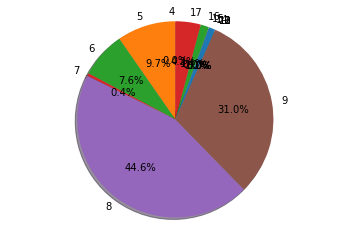

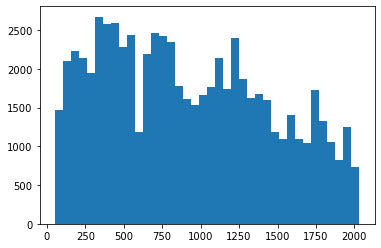

count      38.000000
mean      949.473684
std       942.632598
min         0.000000
25%         0.000000
50%      1149.500000
75%      1772.625000
max      2549.500000
Name: Timestamp, dtype: float64


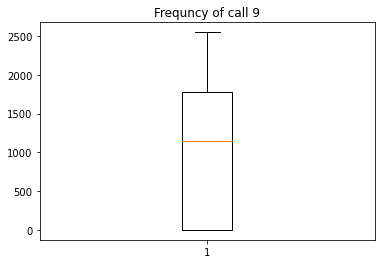

In [46]:
Combined_analysis(Zeus, Jaff, Stop, wanna, sopa, RansomX, TeslaCrypt, revange, GlobeImposter, Ryuk,9)

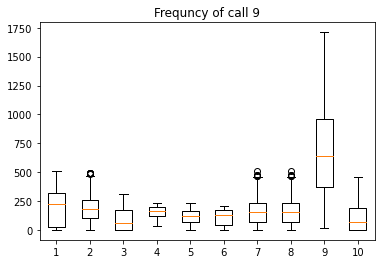

In [47]:
Combined_analysis_boxblots (Zeus, Jaff, Stop, wanna, sopa, RansomX, TeslaCrypt, revange, GlobeImposter, Ryuk, 9)

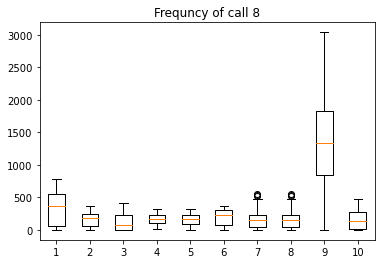

In [48]:
Combined_analysis_boxblots(Zeus, Jaff, Stop, wanna, sopa, RansomX, TeslaCrypt, revange, GlobeImposter, Ryuk, 8)

count     100.000000
mean      507.710000
std       259.872474
min         0.000000
25%       338.500000
50%       538.500000
75%       687.750000
max      1046.000000
Name: Timestamp, dtype: float64


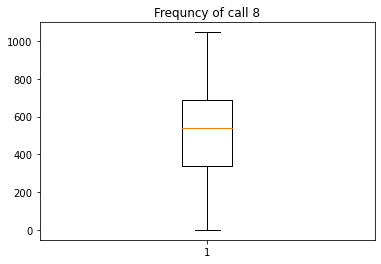

In [49]:
Combined_analysis_by_percentage(Zeus, Jaff, Stop, wanna, sopa, RansomX, TeslaCrypt, revange, GlobeImposter, Ryuk, 8)

In [50]:
number_of_files_for_many(Zeus, Jaff, Stop, wanna, sopa, RansomX, TeslaCrypt, revange, GlobeImposter, Ryuk)


log 1
23134

log 2
12934

log 3
10471

log 4
35848

log 5
20803

log 6
19212

log 7
12812

log 8
7454

log 9
15237

log 10
6097
